## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

### Loading Data.......

In [2]:
# Load the Cardio Data

df = pd.read_csv('C:/Users/ahmed/CardioGoodFitness.csv')

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


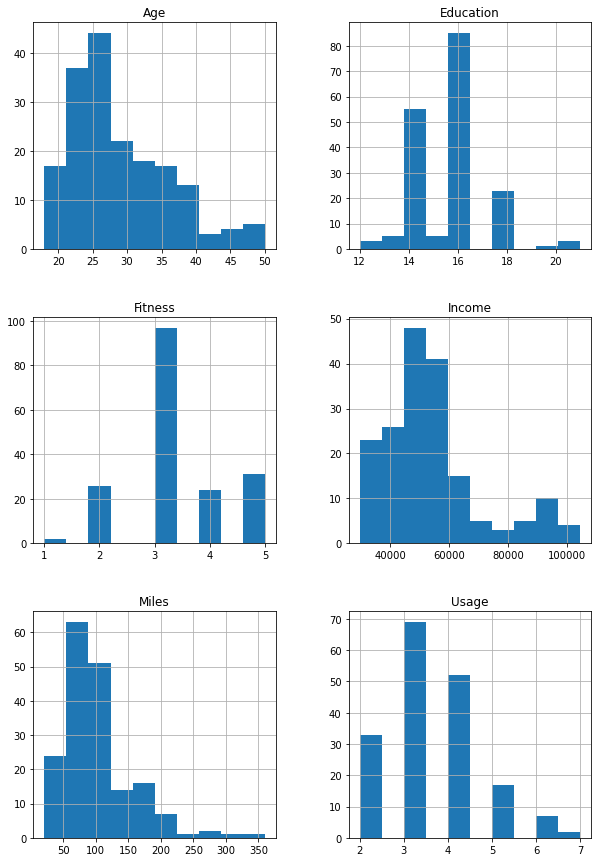

In [5]:
df.hist(figsize=(10,15))
plt.show()

**Age, Income and Miles are positively skewed ( right Skewed )**

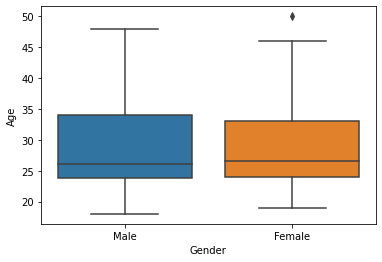

In [36]:
sns.boxplot(x='Gender',y='Age',data=df)
plt.show()

Boxplot of Male and female are overlaping eachother which suggest there is no difference between male and female

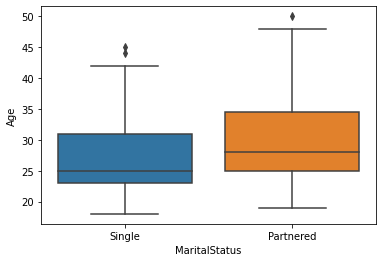

In [35]:
sns.boxplot(x='MaritalStatus',y='Age',data=df)
plt.show()

**Partnered boxplot is more dispersed as compared to Single boxplot**

Single's between the age of 23 and 31 tends to buy the product and if you would like to be more specific then single's between 23 and 25 are the best people to target. 

Partnered people between the age of 25 and 35 tends to buy product and if you'd like to be more specific then partnered between 25 and 28 are the best people to target 

In [8]:
# Frequency of each product for different genders

pd.crosstab(df['Product'],df['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


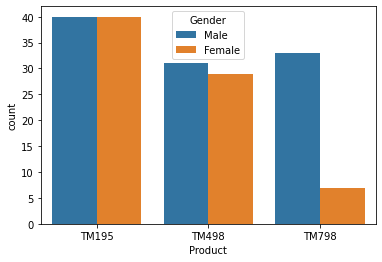

In [34]:
# Graphical Representation of frequency of each product for different genders

sns.countplot(x='Product',hue='Gender',data=df)
plt.show()

TM798 has considerable difference. Other than that product all products seems to not correlate with gender.

### Inferential Statistics

In [10]:
# Probability of next customers' age between 18 and 26
age_18_26= df.loc[(df['Age'] >=18) & (df['Age'] <= 26)]['Age'].sum()/df['Age'].sum()

# Probability of next customers' age between 26 and 50 and printing them
age_26_50= df.loc[(df['Age'] >=26) & (df['Age'] <= 50)]['Age'].sum()/df['Age'].sum()
print('Probability of next customer age b/w 18 and 26 : %.2f%%\nProbability of next customer age b/w 26 and 50 : %.2f%%'%(age_18_26*100,age_26_50*100))

# Probability of next customers income b/w 29k and 50k
Income_min_mid= df.loc[(df['Income'] >=29562) & (df['Income'] <= 50596)]['Income'].sum()/df['Income'].sum()

# Probability of next customers income b/w 50k and 104k and printing them
Income_mid_max= df.loc[(df['Income'] >=50596) & (df['Income'] <= 104581)]['Income'].sum()/df['Income'].sum()
print('\nProbability of next customer income b/w 29k and 50k : %.2f%% \nProbability of next customer income b/w 50k and 104k : %.2f%%'%(Income_min_mid*100,Income_mid_max*100))

# Probability of next customers' Mile between 21 and 94
Mile_min_mid= df.loc[(df['Miles'] >=21) & (df['Miles'] <= 94)]['Miles'].sum()/df['Miles'].sum()

# Probability of next customers' Mile between 94 and 360 and printing them
Mile_mid_max= df.loc[(df['Miles'] >=94) & (df['Miles'] <= 360)]['Miles'].sum()/df['Miles'].sum()
print('\nProbability of next customer mile b/w 21 and 94 : %.2f%% \nProbability of next customer age b/w 94 and 360 : %.2f%%'%(Mile_min_mid*100,Mile_mid_max*100))



Probability of next customer age b/w 18 and 26 : 41.18%
Probability of next customer age b/w 26 and 50 : 64.84%

Probability of next customer income b/w 29k and 50k : 39.27% 
Probability of next customer income b/w 50k and 104k : 60.73%

Probability of next customer mile b/w 21 and 94 : 35.40% 
Probability of next customer age b/w 94 and 360 : 68.65%


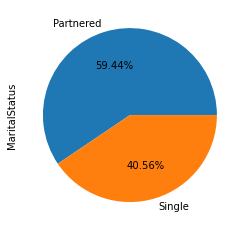

In [30]:
df['MaritalStatus'].value_counts(normalize=True).plot(kind='pie',autopct='%1.2f%%')
plt.show()

In [33]:
import scipy as sp

# Binomial Probability Distribution

binom_mar=sp.stats.binom.pmf(k=100, n=180, p=0.6)

**Probability(exactly 100 partnered customers in 180 attempts)** = 2.8%

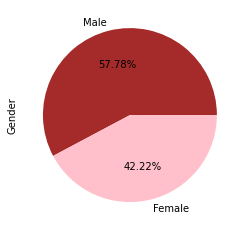

In [29]:
df['Gender'].value_counts(normalize=True).plot(kind='pie',autopct='%1.2f%%',colors=('Brown','Pink'))
plt.show()

In [32]:
binom_gender=sp.stats.binom.pmf(k=70, n=180, p=0.42)

**Probability(exactly 70 Female customers in 180 attempts)** : 4.2%

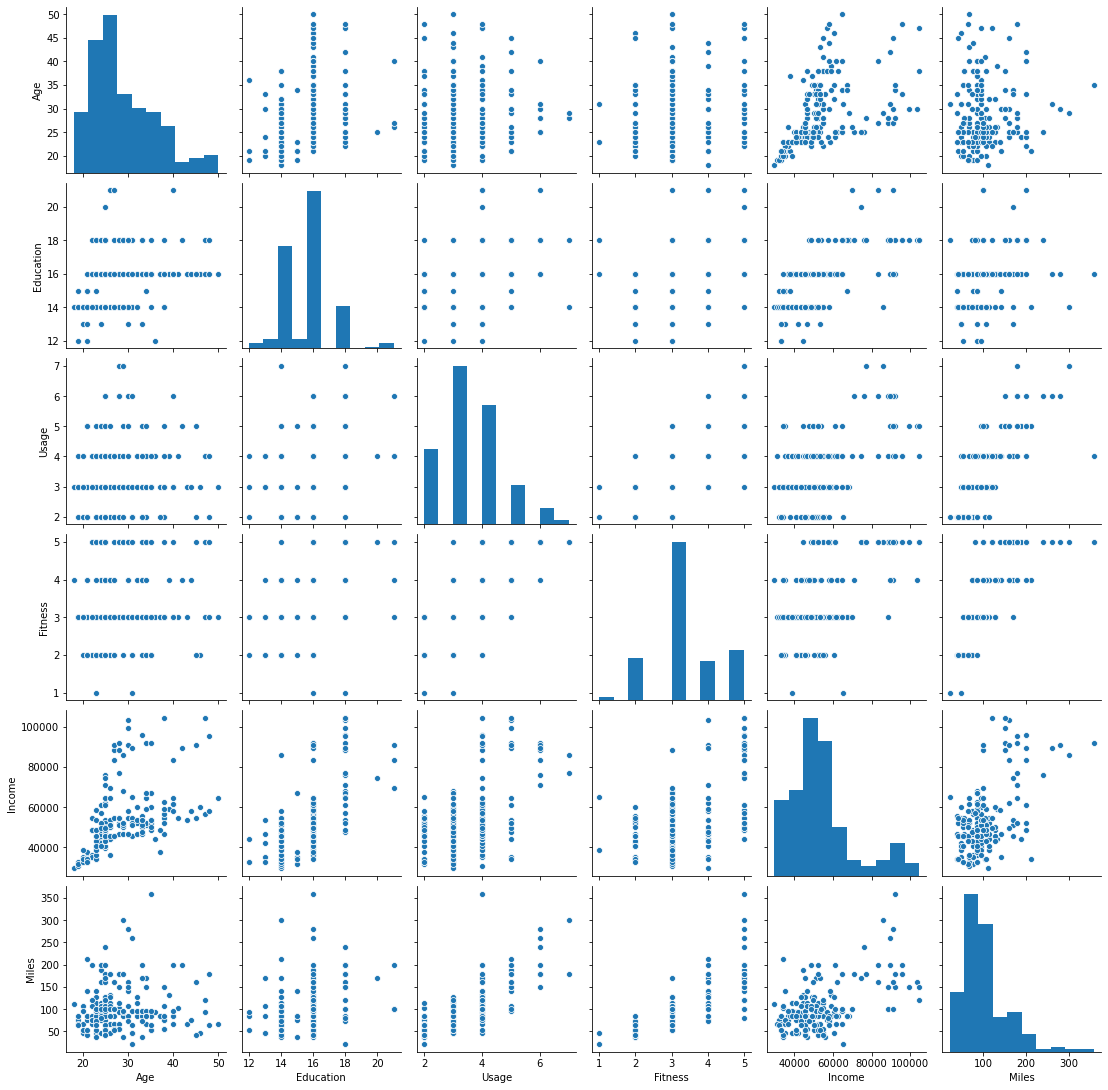

In [14]:
# Correlation b/w variables

sns.pairplot(df)

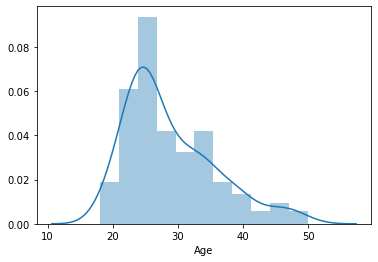

In [37]:
sns.distplot(df['Age'])
plt.show()

Distribution plot infers parameter of population. More data we have more accurate our prediction will be. As for this distribution, it suggest average age of people company should be targeting is between 21 and 30.

## Products with w.r.t different variables

c:\python\python38\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


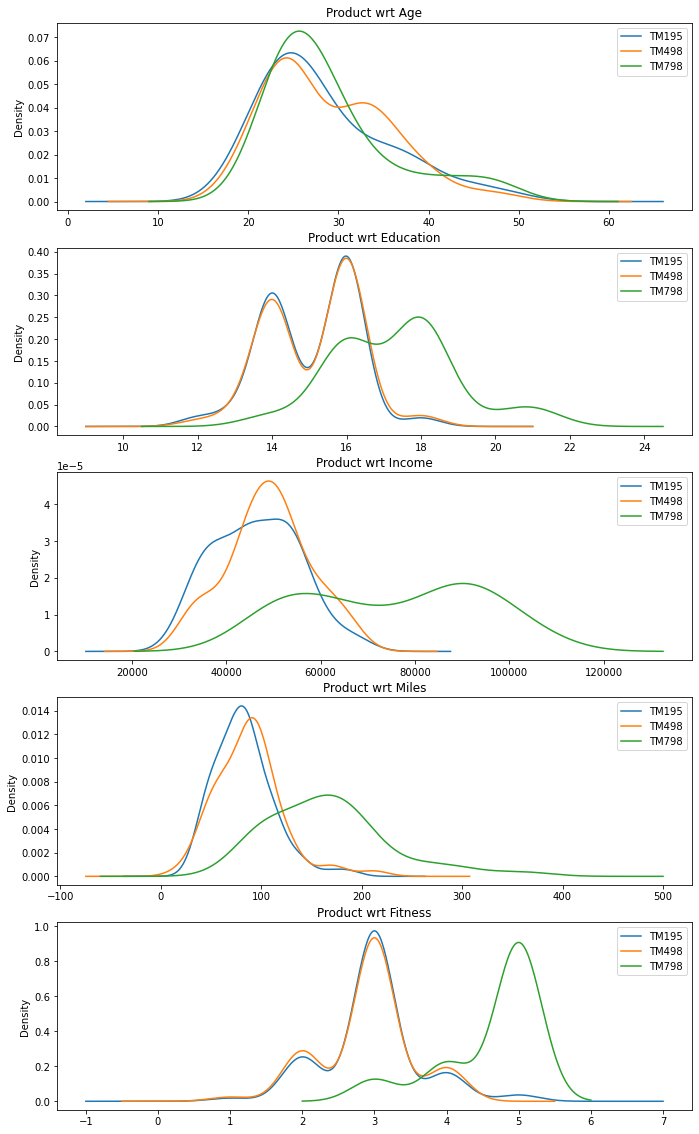

In [38]:
# Figure and its size
fig = plt.figure(figsize=(30,20),constrained_layout=True)

# KDE of product wrt age
plt.subplot2grid((5,5),(0,1),colspan=2)
product = ['TM195','TM498','TM798']
for x in product:
        df.Age[df.Product==x].plot(kind='kde')
plt.legend(['TM195','TM498','TM798'])  
plt.title('Product wrt Age')


# KDE of product wrt Education
plt.subplot2grid((5,5),(1,1),colspan=2)
for x in product:
    df.Education[df.Product==x].plot(kind='kde')
plt.legend(['TM195','TM498','TM798'])    
plt.title('Product wrt Education')

# KDE of product wrt Income
plt.subplot2grid((5,5),(2,1),colspan=2)
for x in product:
    df.Income[df.Product==x].plot(kind='kde')
plt.legend(['TM195','TM498','TM798'])  
plt.title('Product wrt Income')

# KDE of product wrt miles
plt.subplot2grid((5,5),(3,1),colspan=2)
for x in product:
    df.Miles[df.Product==x].plot(kind='kde')
plt.legend(['TM195','TM498','TM798'])  
plt.title('Product wrt Miles')

# KDE of product wrt fitness
plt.subplot2grid((5,5),(4,1),colspan=2)
for x in product:
    df.Fitness[df.Product==x].plot(kind='kde')
plt.legend(['TM195','TM498','TM798'])  
plt.title('Product wrt Fitness')
plt.show()

People with higher education, Income, self-confidence are inclined to buy Product ( TM798 ). Other two products are equally distributed.

## Correlation And ML Models Predictions

In [17]:
corr= df.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


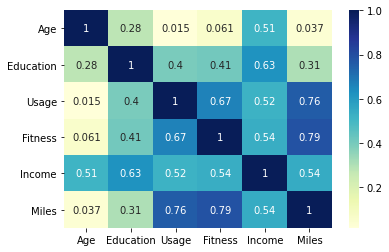

In [39]:
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.show()

### Split Data

In [19]:
x = df[['Usage','Fitness']]
y = df['Miles']

x_train,x_test,y_train,y_test = train_test_split(x,y)

### Linear Regression

In [20]:
ln = LinearRegression()
ln.fit(x_train,y_train)

pred = ln.predict(x_test)
mea = mean_absolute_error(y_test,pred)
print('mean absolute error of Linear Regression= %s'% mea)

mean absolute error of Linear Regression= 17.510925084472294


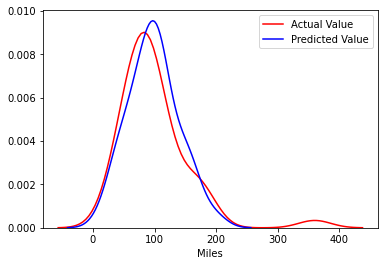

In [40]:
ax1 = sns.distplot(y_test,color = 'r',hist= False, label='Actual Value')

sns.distplot(pred,color = 'b', hist= False,label = 'Predicted Value',ax = ax1)

plt.show()

### Decision Tree

In [22]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

dt_pred=dt.predict(x_test)
mea_dt = mean_absolute_error(y_test,dt_pred)
print('mean absolute error of Decision Tree Regression= %s'% mea_dt)

mean absolute error of Decision Tree Regression= 20.503213689880354


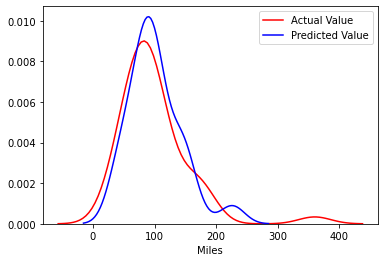

In [41]:
ax1 = sns.distplot(y_test,color = 'r',hist= False, label='Actual Value')

sns.distplot(dt_pred,color = 'b', hist= False,label = 'Predicted Value',ax = ax1)

plt.show()

### Random Forest

In [24]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

rf_pred = rf.predict(x_test)
mea_rf = mean_absolute_error(y_test,rf_pred)
print('mean absolute error of Random forest Regression= %s'% mea_rf)

mean absolute error of Random forest Regression= 20.198187156094605


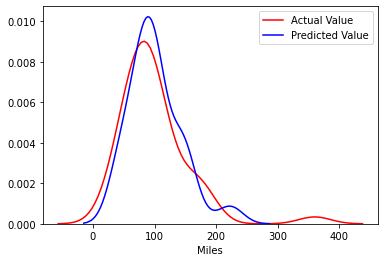

In [42]:
ax1 = sns.distplot(y_test,color = 'r',hist= False, label='Actual Value')

sns.distplot(rf_pred,color = 'b', hist= False,label = 'Predicted Value',ax = ax1)

plt.show()

**On-Sample predictions error**

- MAE of Linear Regression = 17.45

- MAE of Decision Tree Regression = 5.91

- MAE of Random forest Regression = 9.93

**Off-sample predictions error**

- MAE of Linear Regression = 15.92

- MAE of Decision Tree Regression = 20.00

- MAE of Random forest Regression = 19.59

Linear Regression model best fits the data for Off-Sample data which is more important than On-Sample data.